In [ ]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#import warnings
#warnings.filterwarnings("ignore")

### Reading and Extracting Data


In [ ]:
# Load the dataset
curr_directory= os.getcwd()
train_datapath= os.path.join(curr_directory, "Data", "train.csv")
train_df = pd.read_csv(train_datapath)

test_datapath= os.path.join(curr_directory, "Data", "test.csv")
test_df= pd.read_csv(test_datapath)

#Extract data only on women
#df=pd.DataFrame(train_df)
#train_df= df[df['gender'] == 'f']

#df=pd.DataFrame(test_df)
#test_df= df[df['gender'] == 'f']

train_df.shape, test_df.shape

### Sanity Check and Categorizing

In [686]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [687]:
train_df.head

<bound method NDFrame.head of       ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
3      4         0         0         0         0         0         0   
6      7         1         0         0         0         0         0   
9     10         0         0         0         0         0         0   
10    11         1         1         1         1         1         1   
..   ...       ...       ...       ...       ...       ...       ...   
783  784         1         1         1         1         1         1   
786  787         1         1         1         1         1         0   
788  789         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0         0   

     A7_Score  A8_Score  A9_Score  ...  gender        ethnicity jaundice  \
0           1         0      

In [688]:
# Identifying the target column
[x for x in train_df.columns if x not in test_df.columns]

['Class/ASD']

In [689]:
# Finding the non null rows and data type across columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               270 non-null    int64  
 1   A1_Score         270 non-null    int64  
 2   A2_Score         270 non-null    int64  
 3   A3_Score         270 non-null    int64  
 4   A4_Score         270 non-null    int64  
 5   A5_Score         270 non-null    int64  
 6   A6_Score         270 non-null    int64  
 7   A7_Score         270 non-null    int64  
 8   A8_Score         270 non-null    int64  
 9   A9_Score         270 non-null    int64  
 10  A10_Score        270 non-null    int64  
 11  age              270 non-null    float64
 12  gender           270 non-null    object 
 13  ethnicity        270 non-null    object 
 14  jaundice         270 non-null    object 
 15  austim           270 non-null    object 
 16  contry_of_res    270 non-null    object 
 17  used_app_before  270 

In [690]:
#Splitting numerical and categorical columns
def get_num_cat_cols(data):
    
    num_cls = [x for x in data.columns if data[x].dtype != 'object']
    cat_cls = [x for x in data.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)

    return num_cls, cat_cls
    
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [691]:
# Descriptive statistics for numerical columns
train_df[num_cols].describe()

#Information extracted:
#   Columns A1_Score-A10_Score are binary 1 or 0
#   Age: 2-80 yrs
#   at least 75% have ASC

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,404.962963,0.625926,0.562963,0.492593,0.418519,0.425926,0.322222,0.440741,0.533333,0.525926,0.670370,29.373599,8.508617,0.203704
std,227.288229,0.484781,0.496941,0.500874,0.494232,0.495401,0.468195,0.497398,0.499814,0.500255,0.470952,16.539711,4.975614,0.403499
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,205.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.666062,5.191252,0.000000
50%,402.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.453754,9.463980,0.000000
75%,593.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.781110,12.618522,0.000000
max,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.544085,15.853126,1.000000


### Data Cleaning

In [692]:
# Checking for special characters in categorical columns
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*10)
    print(train_df[c].value_counts())
#for columns "relation" & "ethnicity" we have special characters "?"

----------------------------------------------------------------------------------------------------
Column Name - gender
----------
gender
f    270
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - ethnicity
----------
ethnicity
White-European     92
?                  76
Asian              23
Middle Eastern     23
Black              14
South Asian        14
Pasifika            9
Others              8
Latino              7
Hispanic            2
Turkish             1
others              1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - jaundice
----------
jaundice
no     207
yes     63
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - austim
----------
austim
no     228
yes     42
Name: count, dtype: int64
---------

In [693]:
#Questionnaire filled by an professional
print(train_df[train_df['relation'] == 'Health care professional'])

      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
610  611         1         1         0         1         0         0   

     A7_Score  A8_Score  A9_Score  ...  gender  ethnicity jaundice austim  \
610         0         0         0  ...       f          ?      yes     no   

    contry_of_res used_app_before    result     age_desc  \
610         India              no  6.212423  18 and more   

                     relation Class/ASD  
610  Health care professional         0  

[1 rows x 22 columns]


In [694]:
# "?" will be replaced by "others"
#
train_df['relation'] = train_df['relation'].replace('?','Others')
train_df['ethnicity'] = train_df['ethnicity'].replace('?','others')

test_df['relation'] = test_df['relation'].replace('?','Others')
test_df['ethnicity'] = test_df['ethnicity'].replace('?','others')

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\1843918703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['relation'] = test_df['relation'].replace('?','Others')
C:\Users\patel\AppData\Local\Temp\ipykernel_42504\1843918703.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ethnicity'] = test_df['ethnicity'].replace('?','others')


In [695]:
#dropping the column in both train and test dataset
train_df.drop('age_desc',axis=1,inplace=True)
test_df.drop('age_desc',axis=1,inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\3927273646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('age_desc',axis=1,inplace=True)


In [696]:
# Recreating the numerical and categorical columns list
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [697]:
# A(x)_Score being binary acts like a categorial value instead of a continuous value
#In addition following alogorithms won't assume ordinal relationsships if A(x)_Score is categorial
# Moving the binary variables to categorical columns list, for EDA
cat_cols = cat_cols + [x for x in num_cols if '_Score' in x]
print(cat_cols)
num_cols = [x for x in num_cols if x not in cat_cols]
print(num_cols)

# --> resulting in only 2 numerical columns

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
['ID', 'age', 'result', 'Class/ASD']


### EDA

<Axes: xlabel='Class/ASD', ylabel='result'>

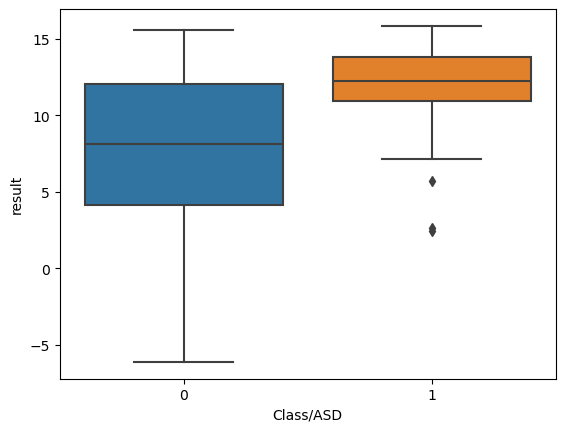

In [698]:
# Possible correlations between ASD - result
sns.boxplot(x = train_df['Class/ASD'], y = train_df['result'])

C:\Users\patel\AnacondaDistribution\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='result', ylabel='Count'>

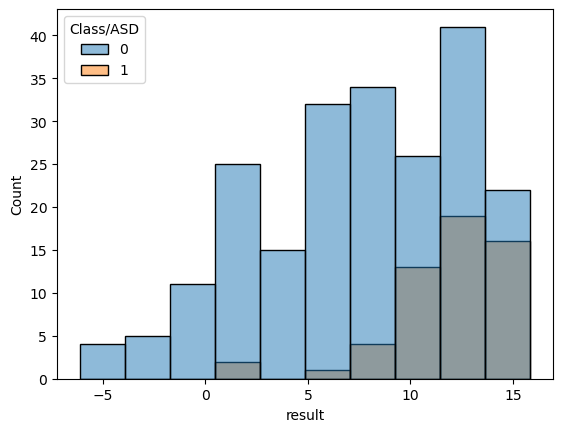

In [699]:
sns.histplot(x = train_df['result'], hue = train_df['Class/ASD'])

C:\Users\patel\AnacondaDistribution\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='austim', ylabel='Count'>

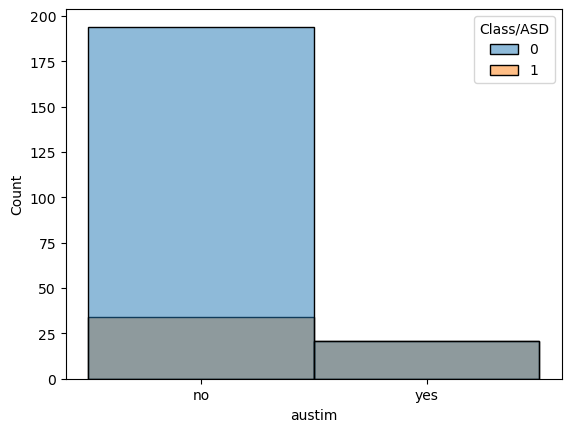

In [700]:
sns.histplot(x = train_df['austim'], hue = train_df['Class/ASD'])

In [701]:
# Function to conduct chi square test between categorical feature and target feature 
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

#enhancing results with either the Bayesian method or resampling methods like bootstrapping or permutation

In [702]:
# Function: Stacked bar graphs between categorical feature and target variable, 
# also helps us know the dependent variable using chisquare function - this step is feature selection
def cat_col_test(df, cat_colname, target_colname):
    
    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

Column name - gender
p value is 1.0
Both variables are Independent (H0 holds true)


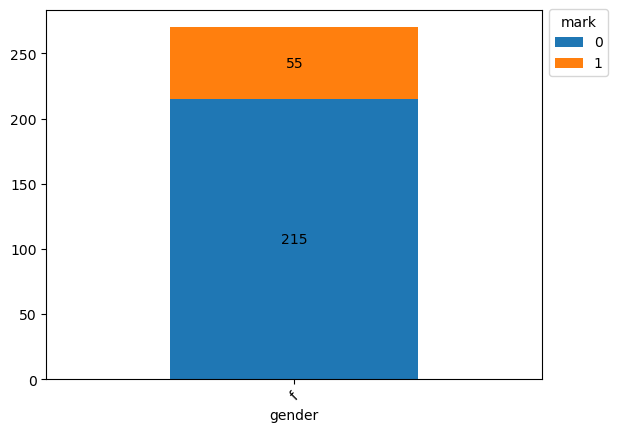

Column name - ethnicity
p value is 6.15416776799905e-11
Both variables are Dependent (reject H0)


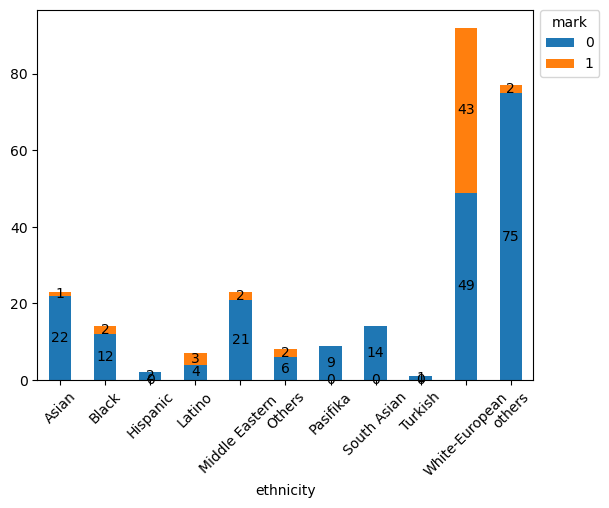

Column name - jaundice
p value is 0.017230028418325573
Both variables are Dependent (reject H0)


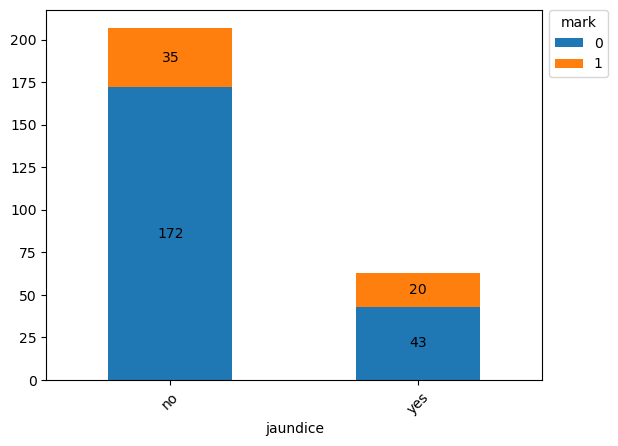

Column name - austim
p value is 6.362340969122365e-07
Both variables are Dependent (reject H0)


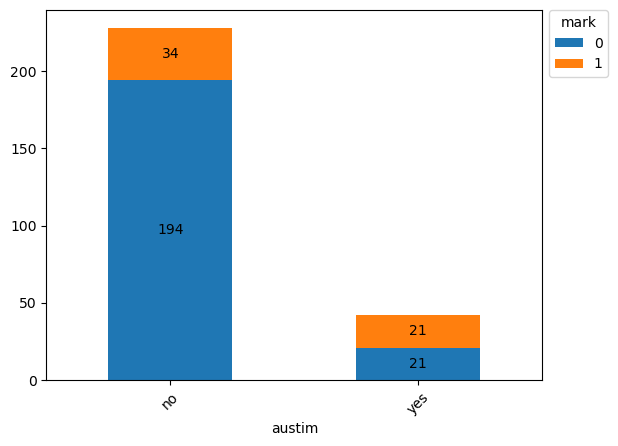

Column name - contry_of_res
p value is 8.4313224541136e-05
Both variables are Dependent (reject H0)


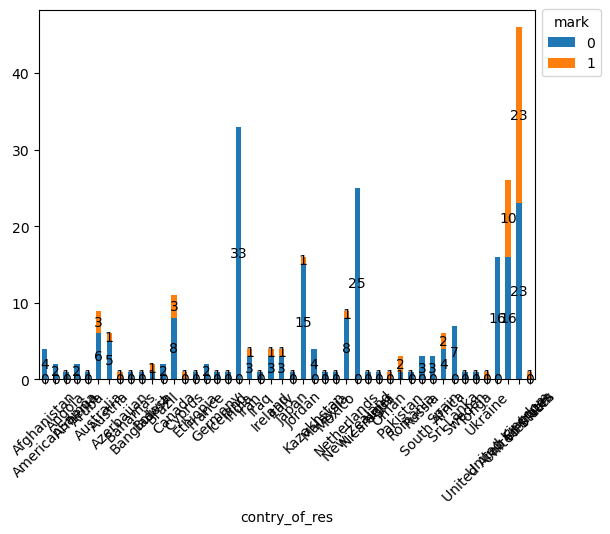

Column name - used_app_before
p value is 0.6136928196782612
Both variables are Independent (H0 holds true)


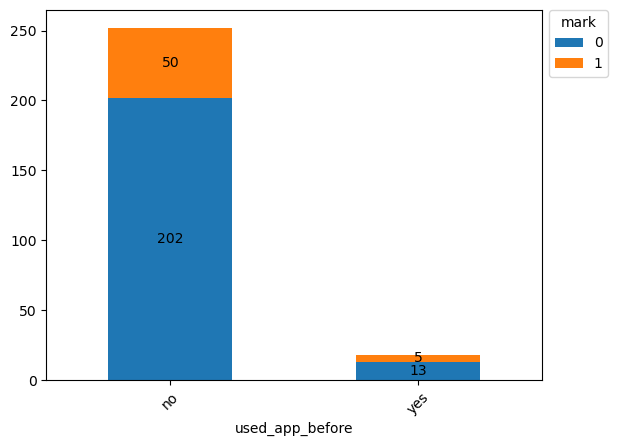

Column name - relation
p value is 0.2091972583801398
Both variables are Independent (H0 holds true)


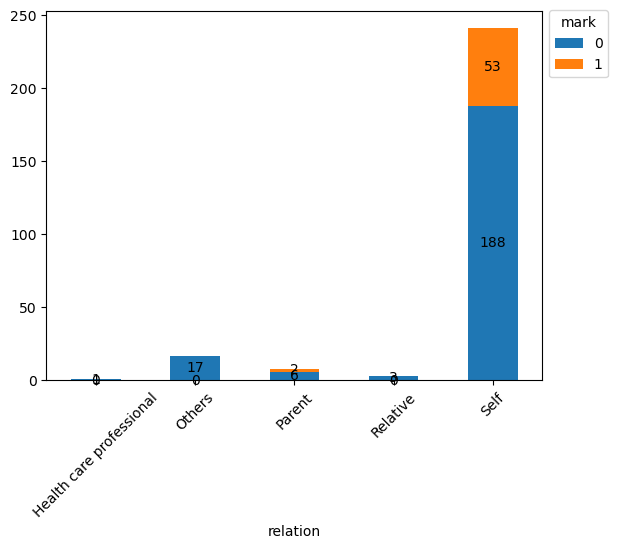

Column name - A1_Score
p value is 4.450735896554666e-05
Both variables are Dependent (reject H0)


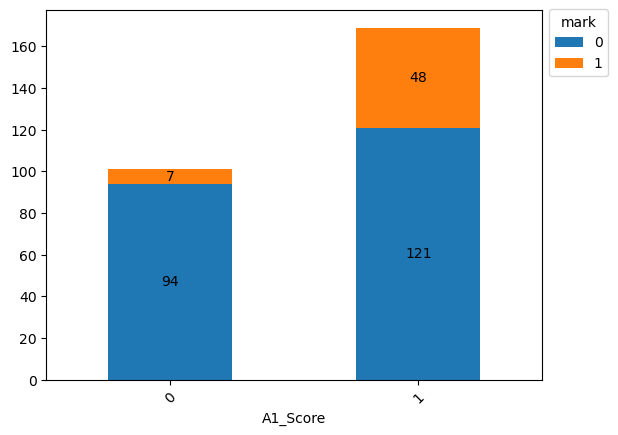

Column name - A2_Score
p value is 9.171095304396603e-08
Both variables are Dependent (reject H0)


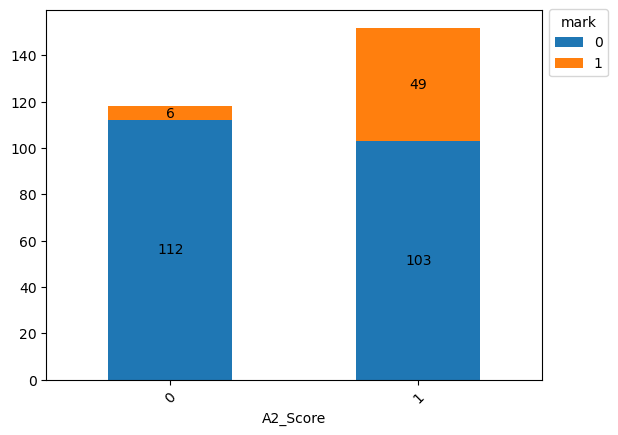

Column name - A3_Score
p value is 6.91440110496025e-10
Both variables are Dependent (reject H0)


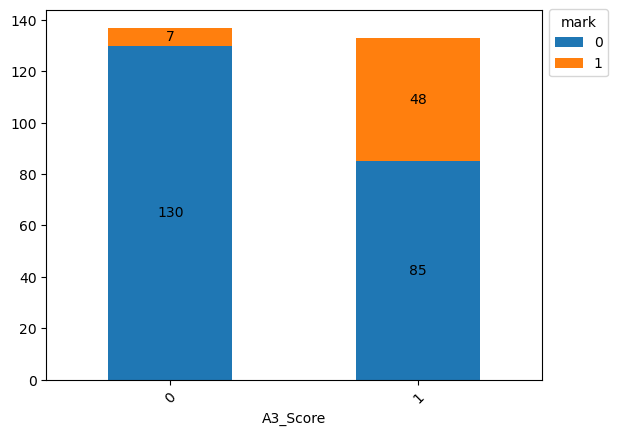

Column name - A4_Score
p value is 5.943552634792169e-15
Both variables are Dependent (reject H0)


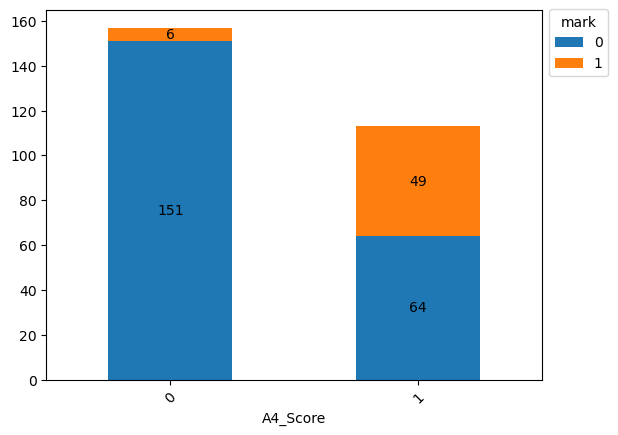

Column name - A5_Score
p value is 5.5851550005002315e-09
Both variables are Dependent (reject H0)


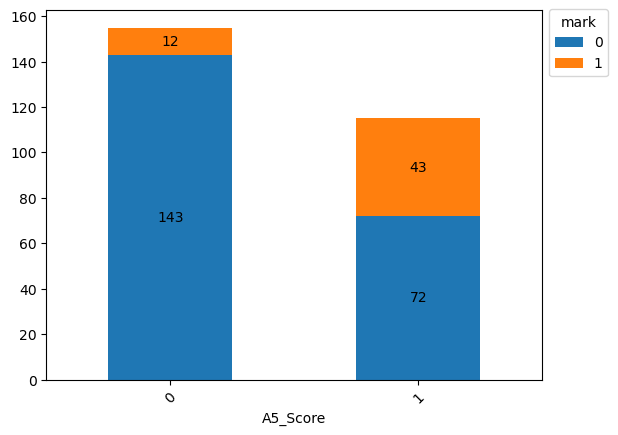

Column name - A6_Score
p value is 1.771806323309438e-13
Both variables are Dependent (reject H0)


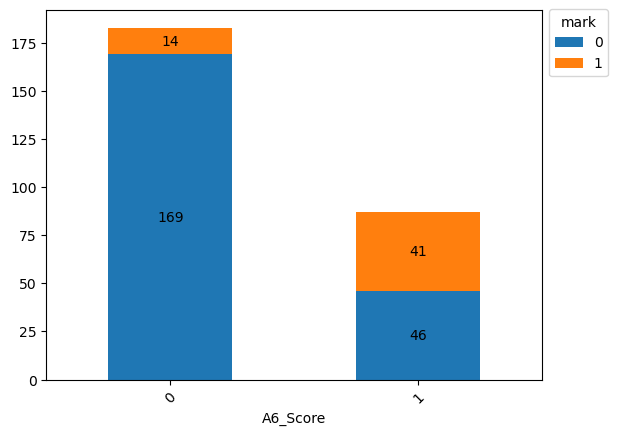

Column name - A7_Score
p value is 9.774270565093968e-11
Both variables are Dependent (reject H0)


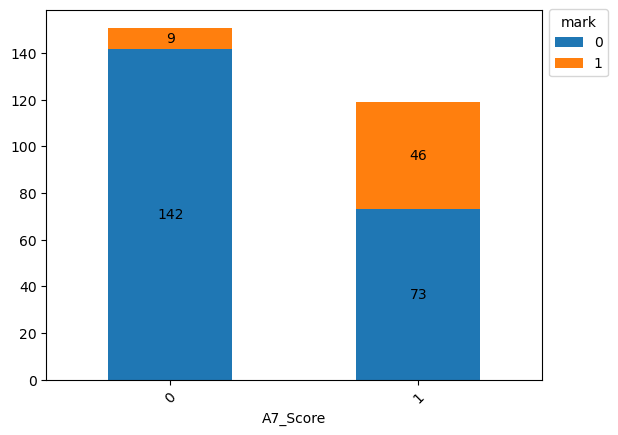

Column name - A8_Score
p value is 4.353213491369823e-06
Both variables are Dependent (reject H0)


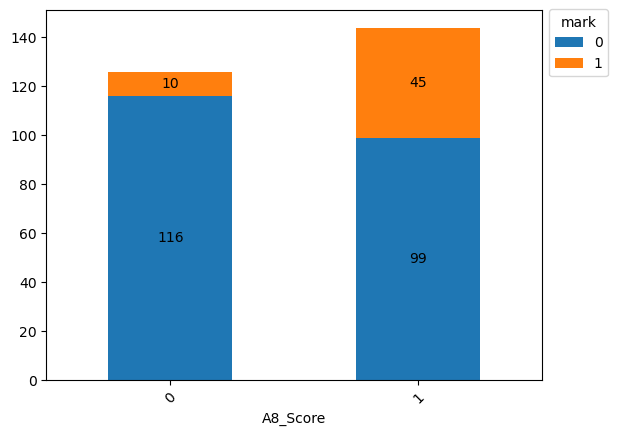

Column name - A9_Score
p value is 8.412545910399114e-12
Both variables are Dependent (reject H0)


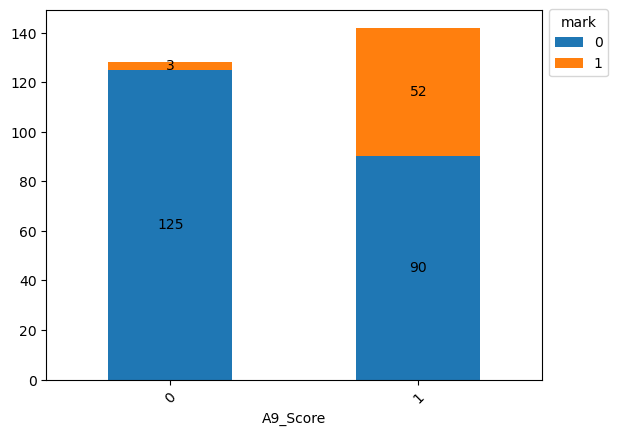

Column name - A10_Score
p value is 9.013701891058173e-08
Both variables are Dependent (reject H0)


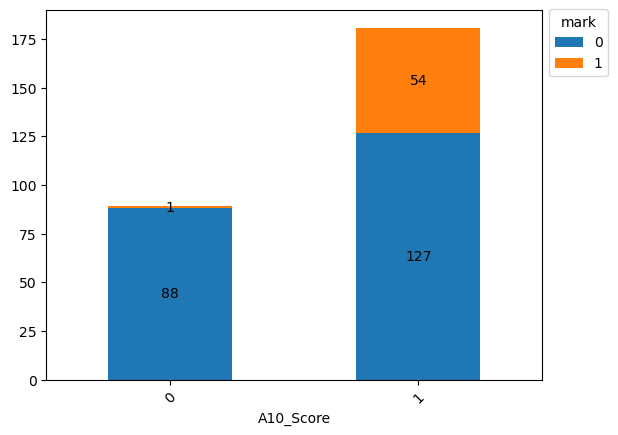

In [703]:
for c in cat_cols:
    cat_col_test(train_df, c, 'Class/ASD')

In [704]:
train_df.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,38.172746,f,others,no,no,Austria,no,6.351166,Self,0
3,4,0,0,0,0,0,0,0,0,0,...,23.561927,f,others,no,no,United States,no,2.276617,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,28.427971,f,Pasifika,no,no,United Kingdom,no,7.984569,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,24.167945,f,Others,yes,no,New Zealand,no,14.922570,Self,0
10,11,1,1,1,1,1,1,1,0,1,...,21.497031,f,others,no,no,Canada,no,13.839255,Self,0


In [705]:
#Dropping #use_app_before & gender & relation are independant
#train_df.drop(['used_app_before','gender', 'relation'],axis=1,inplace=True)
#test_df.drop(['used_app_before','gender', 'relation'],axis=1,inplace=True)

train_df.drop(['used_app_before','gender'],axis=1,inplace=True)
test_df.drop(['used_app_before','gender'],axis=1,inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\3971968527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['used_app_before','gender'],axis=1,inplace=True)


In [706]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [707]:
# One hot encoding: categorical variables into numerical format
# np.where for "yes"= 1, "no"=0 for columns "jaundice" and "austim"
train_df['jaundice'] = np.where(train_df['jaundice'] == 'yes',1,0)
test_df['jaundice'] = np.where(test_df['jaundice'] == 'yes',1,0)

train_df['austim'] = np.where(train_df['austim'] == 'yes',1,0)
test_df['austim'] = np.where(test_df['austim'] == 'yes',1,0)

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\183779996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['jaundice'] = np.where(test_df['jaundice'] == 'yes',1,0)
C:\Users\patel\AppData\Local\Temp\ipykernel_42504\183779996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['austim'] = np.where(test_df['austim'] == 'yes',1,0)


In [708]:
# Label encoding based on frequency values of the categorical variable
#column: ethnicity
dict_ethnicity = dict(zip(train_df['ethnicity'].value_counts().index, range(1,train_df['ethnicity'].nunique()+1)))
dict_ethnicity

{'White-European': 1,
 'others': 2,
 'Asian': 3,
 'Middle Eastern ': 4,
 'Black': 5,
 'South Asian': 6,
 'Pasifika': 7,
 'Others': 8,
 'Latino': 9,
 'Hispanic': 10,
 'Turkish': 11}

In [709]:
# Applying label encoding dictionary to data
train_df['ethnicity'] = train_df['ethnicity'].map(dict_ethnicity)
test_df['ethnicity'] = test_df['ethnicity'].map(dict_ethnicity)

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\3790230627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ethnicity'] = test_df['ethnicity'].map(dict_ethnicity)


In [710]:
#label encoding column country_of_res
col_name = 'contry_of_res'
dict_country = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_country)
test_df[col_name] = test_df[col_name].map(dict_country)

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\1357501153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col_name] = test_df[col_name].map(dict_country)


In [711]:
col_name = 'relation'
dict_relation = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_relation)
test_df[col_name] = test_df[col_name].map(dict_relation)

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\1946382513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[col_name] = test_df[col_name].map(dict_relation)


In [713]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,2,0,0,11,6.351166,1,0
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,2,0,0,1,2.276617,1,0
6,7,1,0,0,0,0,0,1,1,1,0,28.427971,7,0,0,3,7.984569,1,0
9,10,0,0,0,0,0,0,0,1,0,1,24.167945,8,1,0,4,14.922570,1,0
10,11,1,1,1,1,1,1,1,0,1,1,21.497031,2,0,0,7,13.839255,1,0


In [714]:
test_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jaundice,austim,contry_of_res,result,relation
5,6,0,0,0,0,0,0,1,0,0,0,31.258965,2,1,0,8.0,2.676620,1
7,8,1,1,1,0,1,1,0,1,0,1,24.606191,2,0,0,2.0,1.501130,1
9,10,1,0,0,0,0,0,0,0,0,0,24.167762,4,1,0,NaN,8.449266,1
11,12,0,1,0,1,1,0,0,0,1,0,19.825266,1,0,0,3.0,12.527543,3
12,13,0,1,0,0,0,0,0,1,0,0,55.063719,3,0,0,5.0,12.022892,1


In [715]:
#Checking for missing value
train_df.isnull().sum()

ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

In [716]:
test_df.isnull().sum()

ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    4
result           0
relation         0
dtype: int64

In [717]:
# filling NaN values in country_of_res
test_df['contry_of_res'].fillna(1.0,inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_42504\3063115462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['contry_of_res'].fillna(1.0,inplace=True)


### Efficiency Evaluation of Models
- More neural network additions were not considered, as the MLPClassifier was constantly overfitting

In [718]:
#seperating feature and traget variable
X = train_df.drop(['ID','Class/ASD'],axis=1) #feature variable
y = train_df['Class/ASD'] #target variable

X.shape, y.shape

((270, 17), (270,))

In [719]:
# Ensure y is 1D
if len(y.shape) > 1 and y.shape[1] > 1:
    print("y should be a 1D array.")
else:
    print("y is correctly formatted.")

y is correctly formatted.


In [720]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [721]:
#Setting random seed
seed = 123
# Various model initialization
model1 = LogisticRegression(max_iter = 500)
model2 = SVC(random_state = seed)
model3 = GaussianNB()
model4 = MLPClassifier(random_state = seed,max_iter=500)
model5 = SGDClassifier(random_state = seed)
model6 = KNeighborsClassifier()
model7 = DecisionTreeClassifier(random_state = seed)
model8 = RandomForestClassifier(random_state = seed,class_weight="balanced")
model9 = GradientBoostingClassifier(random_state = seed)
model10 = LGBMClassifier(random_state = seed)
model11 = XGBClassifier(random_state = seed,use_label_encoder=False)

In [ ]:
#optimizing LightGMB due to overfitting warnings with GridSearch

#Define the model
model = LGBMClassifier(random_state=seed)

#Define the parameter grid
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [3, 5, 7],
    'n_estimators': [30, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1, verbose=1)

#Fit the model
grid_search.fit(X, y)

#Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

In [ ]:
#optimizing MLPClassifier due to overfitting warnings with GridSearch

param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 400, 600, 800],
    'verbose': [False] 
    }# Set verbose to False to avoid excessive output

#Initialize the MLPClassifier with the seed
mlp = MLPClassifier(random_state=seed)

#Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, scoring='f1', cv=5, n_jobs=-1)

#Fit the grid search object to the training data
grid_search.fit(X, y)

#Print the best parameters and the best F1 score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

In [722]:
#After optimizing hyperparameters for models which were overfitting

#Setting random seed
seed = 123
# Various model initialization after optimizing models with overfitting warnings/ characteristics
model1 = LogisticRegression(max_iter = 500, C=0.5)
model2 = SVC(random_state = seed, C=0.5, gamma='scale')
model3 = GaussianNB(var_smoothing=1e-9)
model4 = MLPClassifier(random_state=seed, activation='relu', alpha=0.1, hidden_layer_sizes= (10,), max_iter=400, learning_rate_init=0.001, solver='lbfgs', verbose=False)
model5 = SGDClassifier(random_state = seed, alpha=0.01)
model6 = KNeighborsClassifier(n_neighbors=3)
model7 = DecisionTreeClassifier(random_state = seed, max_depth=3)
model8 = RandomForestClassifier(random_state = seed,class_weight="balanced", n_estimators=50, max_depth=5)
model9 = GradientBoostingClassifier(random_state = seed, n_estimators=50, learning_rate= 0.05, max_depth=3)
model10 = LGBMClassifier(random_state = seed, num_leaves=15, max_depth=3, n_estimators=30, learning_rate=0.1, class_weight='balanced', min_child_samples=10, subsample=0.6, colsample_bytree=0.6, verbose=-1, reg_alpha=0.1)
model11 = XGBClassifier(random_state = seed, n_estimators=50, max_depth=3, learning_rate=0.05)

In [723]:
# Evaluate ML models with cross-validation: ROC AUC and F1-Score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

models = [model1, model2, model3, model5, model6, model7,
          model8, model9, model10, model11]

#model_names = ['Logistic Regression', 'SVC', 'Gaussian NB', 'MLP Classifier',
               #'SGD Classifier', 'K-Neighbors Classifier', 'Decision Tree Classifier',
               #'Random Forest Classifier', 'Gradient Boosting Classifier',
               #'LightGBM Classifier', 'XGBoost Classifier']

for m in range(len(models)):
    model = models[m]
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
    print(f"For no of trees {m+1} - {np.mean(scores)}")
for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, scoring='f1', cv=5)
    print(f"For model {i+1} - {np.mean(scores)}")

For no of trees 1 - 0.86553911205074
For no of trees 2 - 0.7835095137420719
For no of trees 3 - 0.8792811839323467
For no of trees 4 - 0.8164904862579281
For no of trees 5 - 0.7363636363636363
For no of trees 6 - 0.7769556025369979
For no of trees 7 - 0.8887949260042284
For no of trees 8 - 0.8636363636363636
For no of trees 9 - 0.8835095137420719
For no of trees 10 - 0.8701902748414376
For model 1 - 0.5497835497835497
For model 2 - 0.0
For model 3 - 0.6174232804232804
For model 4 - 0.4062515262515262
For model 5 - 0.4227272727272727
For model 6 - 0.5370909090909091
For model 7 - 0.5923105590062112
For model 8 - 0.4984795321637427
For model 9 - 0.5939565063267729
For model 10 - 0.5558806106174528


### Creating weighted esemble with top 3 algorithms

In [724]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, f1_score

# Setting up cross-validation while maintaining percentage of samples for each class labels
kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle = True)

# Data preperation
X1 = np.array(X)
y1 = np.array(y)

# Define parameter grids for hyperparameter tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create models
dt_model = DecisionTreeClassifier(random_state=123)
gb_model = GradientBoostingClassifier(random_state=123)

# Hyperparameter tuning using GridSearchCV
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the models
grid_search_dt.fit(X1, y1)
grid_search_gb.fit(X1, y1)

# Get best parameters
best_dt = grid_search_dt.best_estimator_
best_gb = grid_search_gb.best_estimator_

print("Best Decision Tree parameters:", grid_search_dt.best_params_)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)


Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Gradient Boosting parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


scores_auc = []
scores_f1 = []

kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle = True)


#Crossvalidation loop for training model and model prediction rates
for i, (train_index, test_index) in enumerate(skf.split(X1, y1)):
    print(f'[Fold {i + 1}/{kfold}]')
    X_train, X_valid = X1[train_index], X1[test_index]
    y_train, y_valid = y1[train_index], y1[test_index]
    
#Fit models and get predictions
    model1 = DecisionTreeClassifier(random_state=seed, criterion='entropy', max_depth=10, min_samples_split=10)
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict_proba(X_valid)[:, 1]
    
    model2 = GradientBoostingClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=5)
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict_proba(X_valid)[:, 1]
    
    model3 = GaussianNB(var_smoothing=1e-9)
    model3.fit(X_train, y_train)
    y_pred3 = model3.predict_proba(X_valid)[:, 1]

    # Calculate F1-scores for each model
    f1_scores = [
        f1_score(y_valid, np.where(y_pred1 < 0.5, 0, 1)),
        f1_score(y_valid, np.where(y_pred2 < 0.5, 0, 1)),
        f1_score(y_valid, np.where(y_pred3 < 0.5, 0, 1))
    ]

#Original: fixed weights     y_pred = 0.2 * y_pred1 + 0.15 * y_pred2 + 0.65*y_pred3
    #also tried dynamic weighing with ROC AUC Score & Stacking Classifier, but worse F1-Score
    # Calculate weights based on F1-scores
    total_f1_score = sum(f1_scores)
    weights = [score / total_f1_score for score in f1_scores]

    # Combine predictions with dynamic weights
    y_pred = weights[0] * y_pred1 + weights[1] * y_pred2 + weights[2] * y_pred3
    
    # Calculate ROC AUC score for the combined predictions
    score_auc = roc_auc_score(y_valid, y_pred)
    scores_auc.append(score_auc)
    
    # Calculate F1-score for the combined predictions
    y_pred_label = np.where(y_pred < 0.5, 0, 1)
    score_f1 = f1_score(y_valid, y_pred_label)
    scores_f1.append(score_f1)

    print(f'Fold {i + 1}/{kfold} - AUC Score: {score_auc}, F1 Score: {score_f1}')

 #Print average scores across all folds
print(f"Avg AUC score - {np.mean(scores_auc)}")
print(f"Avg F1 score - {np.mean(scores_f1)}")

In [725]:
scores_auc = []
scores_f1 = []

kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle = True)


# Crossvalidation loop for training model and model prediction rates
for i, (train_index, test_index) in enumerate(skf.split(X1, y1)):
    print(f'[Fold {i + 1}/{kfold}]')
    X_train, X_valid = X1[train_index], X1[test_index]
    y_train, y_valid = y1[train_index], y1[test_index]
    
    # Fit models and get predictions
    model1 = DecisionTreeClassifier(random_state=seed, criterion='entropy', max_depth=10, min_samples_split=10)
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict_proba(X_valid)[:, 1]
    
    model2 = GradientBoostingClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=5)
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict_proba(X_valid)[:, 1]
    
    model3 = GaussianNB(var_smoothing=1e-9)
    model3.fit(X_train, y_train)
    y_pred3 = model3.predict_proba(X_valid)[:, 1]

    # Calculate F1-scores for each model
    f1_scores = [
        f1_score(y_valid, np.where(y_pred1 < 0.55, 0, 1)),
        f1_score(y_valid, np.where(y_pred2 < 0.55, 0, 1)),
        f1_score(y_valid, np.where(y_pred3 < 0.55, 0, 1))
    ]
# Weighing of the models with fixed parameters
    #also tried dynamic weighing with F1_Score (as seen above), ROC AUC Score & Stacking Classifier --> all produce worse results
    y_pred = 0.2 * y_pred1 + 0.15 * y_pred2 + 0.65*y_pred3
# Calculate ROC AUC score for the combined predictions
    score_auc = roc_auc_score(y_valid, y_pred)
    scores_auc.append(score_auc)
    
    # Calculate F1-score for the combined predictions
    y_pred_label = np.where(y_pred < 0.55, 0, 1)
    score_f1 = f1_score(y_valid, y_pred_label)
    scores_f1.append(score_f1)

    print(f'Fold {i + 1}/{kfold} - AUC Score: {score_auc}, F1 Score: {score_f1}')

# Print average scores across all folds
print(f"Avg AUC score - {np.mean(scores_auc)}")
print(f"Avg F1 score - {np.mean(scores_f1)}")

[Fold 1/5]
Fold 1/5 - AUC Score: 0.8816067653276956, F1 Score: 0.6206896551724137
[Fold 2/5]
Fold 2/5 - AUC Score: 0.9133192389006343, F1 Score: 0.7142857142857143
[Fold 3/5]
Fold 3/5 - AUC Score: 0.8837209302325582, F1 Score: 0.6206896551724137
[Fold 4/5]
Fold 4/5 - AUC Score: 0.7991543340380549, F1 Score: 0.4848484848484849
[Fold 5/5]
Fold 5/5 - AUC Score: 0.8837209302325582, F1 Score: 0.5454545454545454
Avg AUC score - 0.8723044397463001
Avg F1 score - 0.5971936109867144


### Algorithm with Domain Knowledge Incorporation

#tried implementing indicators to input domain knowledge, but the only option was dropping columns
--> isn't productive with a small sample size
#still implementing indicators and output as their values, was an insight into what the algorithm prioritises 

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np

#Initialize scores
scores_auc = []
scores_f1 = []
kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle=True)

#Define domain knowledge-based feature selection
important_features = ['A1_Score', 'A3_Score', 'A7_Score', 'A9_Score', 'A10_Score']  # Example feature names

#Cross-validation loop
for i, (train_index, test_index) in enumerate(skf.split(X1, y1)):
    print(f'[Fold {i + 1}/{kfold}]')
    
    # Use simple indexing for NumPy arrays
    X_train, X_valid = X1[train_index], X1[test_index]
    y_train, y_valid = y1[train_index], y1[test_index]

    # Assuming you have a list of feature names to get indices
    feature_names = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']  # Example feature names list
    important_features_indices = [feature_names.index(name) for name in important_features]

    # Fit models
    model1 = DecisionTreeClassifier(random_state=seed, criterion='entropy', max_depth=10, min_samples_split=10)
    model1.fit(X_train, y_train)

    model2 = GradientBoostingClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=5)
    model2.fit(X_train, y_train)

    model3 = GaussianNB(var_smoothing=1e-9)
    model3.fit(X_train, y_train)

    # Get predictions
    y_pred1 = model1.predict_proba(X_valid)[:, 1]
    y_pred2 = model2.predict_proba(X_valid)[:, 1]
    y_pred3 = model3.predict_proba(X_valid)[:, 1]

    # Feature importance
    importance1 = model1.feature_importances_
    importance2 = model2.feature_importances_

    # Print feature importances for analysis
    print(f'Feature importances from model1: {importance1}')
    print(f'Feature importances from model2: {importance2}')

    # Select important features based on indices
    X_train_important = X_train[:, important_features_indices]  # Select important features
    X_valid_important = X_valid[:, important_features_indices]  # Select important features

    # Fit models on important features only
    model1.fit(X_train_important, y_train)
    model2.fit(X_train_important, y_train)
    model3.fit(X_train_important, y_train)

    # Get predictions for important features
    y_pred1 = model1.predict_proba(X_valid_important)[:, 1]
    y_pred2 = model2.predict_proba(X_valid_important)[:, 1]
    y_pred3 = model3.predict_proba(X_valid_important)[:, 1]

    # Combine predictions
    y_pred = 0.2 * y_pred1 + 0.15 * y_pred2 + 0.65 * y_pred3

    # Calculate metrics
    score_auc = roc_auc_score(y_valid, y_pred)
    scores_auc.append(score_auc)

    # Convert probabilities to binary predictions for F1 score
    y_pred_label = np.where(y_pred < 0.5, 0, 1)
    score_f1 = f1_score(y_valid, y_pred_label)
    scores_f1.append(score_f1)

    # Print scores for the current fold
    print(f'Fold {i + 1}/{kfold} - AUC Score: {score_auc:.4f}, F1 Score: {score_f1:.4f}')

#Print average scores across all folds
print(f"Avg AUC score - {np.mean(scores_auc):.4f}")
print(f"Avg F1 score - {np.mean(scores_f1):.4f}")


In [735]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_auc_score

# Assuming X1 and y1 are already defined as your features and target variable

# Custom scaling function
def custom_scale(feature, scale_factor):
    return feature * scale_factor

# Create a DataFrame from X1 for easier manipulation
df = pd.DataFrame(X1)

# Identify important features (for example purposes, let's assume feature indices 0 and 2 are important)
important_feature_indices = [0, 6, 9]  # Indices of important features
scaling_factors = {0 : 1.5, 6: 1.88, 9: 1.6 } # Scaling factors for each feature

# Scale the important features individually
for index in important_feature_indices:
    df[index] = custom_scale(df[index], scaling_factors[index])

# Convert back to numpy array for model training
X1_scaled = df.values

scores_auc = []
scores_f1 = []

kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle=True)

# Cross-validation loop for training model and model prediction rates
for i, (train_index, test_index) in enumerate(skf.split(X1_scaled, y1)):
    print(f'[Fold {i + 1}/{kfold}]')
    X_train, X_valid = X1_scaled[train_index], X1_scaled[test_index]
    y_train, y_valid = y1[train_index], y1[test_index]
    
    # Fit models and get predictions
    model1 = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10, min_samples_split=10)
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict_proba(X_valid)[:, 1]
    
    model2 = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict_proba(X_valid)[:, 1]
    
    model3 = GaussianNB(var_smoothing=1e-9)
    model3.fit(X_train, y_train)
    y_pred3 = model3.predict_proba(X_valid)[:, 1]

    # Calculate F1-scores for each model
    f1_scores = [
        f1_score(y_valid, np.where(y_pred1 < 0.5, 0, 1)),
        f1_score(y_valid, np.where(y_pred2 < 0.5, 0, 1)),
        f1_score(y_valid, np.where(y_pred3 < 0.5, 0, 1))
    ]
    
    # Weighing of the models with fixed parameters
    y_pred = 0.2 * y_pred1 + 0.15 * y_pred2 + 0.65 * y_pred3
    
    # Calculate ROC AUC score for the combined predictions
    score_auc = roc_auc_score(y_valid, y_pred)
    scores_auc.append(score_auc)
    
    # Calculate F1-score for the combined predictions
    y_pred_label = np.where(y_pred < 0.5, 0, 1)
    score_f1 = f1_score(y_valid, y_pred_label)
    scores_f1.append(score_f1)

    print(f'Fold {i + 1}/{kfold} - AUC Score: {score_auc}, F1 Score: {score_f1}')

# Print average scores across all folds
print(f"Avg AUC score - {np.mean(scores_auc)}")
print(f"Avg F1 score - {np.mean(scores_f1)}")

[Fold 1/5]
Fold 1/5 - AUC Score: 0.8012684989429175, F1 Score: 0.6206896551724137
[Fold 2/5]
Fold 2/5 - AUC Score: 0.9154334038054968, F1 Score: 0.6153846153846153
[Fold 3/5]
Fold 3/5 - AUC Score: 0.9640591966173362, F1 Score: 0.6111111111111112
[Fold 4/5]
Fold 4/5 - AUC Score: 0.904862579281184, F1 Score: 0.6896551724137931
[Fold 5/5]
Fold 5/5 - AUC Score: 0.8752642706131077, F1 Score: 0.6153846153846153
Avg AUC score - 0.8921775898520086
Avg F1 score - 0.6304450338933097
